# Create training dataset from varsom data


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import logging
from flatten_json import flatten
from pprint import pprint
# make sure the aps module is in the pythonpath
import sys
from pathlib import Path

APS_dir = str(Path.cwd().parents[1])
if APS_dir not in sys.path:
    sys.path.append(APS_dir)
import aps.aps_io.get_forecasts as gf

In [41]:
%matplotlib inline

In [2]:
# Nordvestlandet: Trollheimen, Romsdal, Sunnmøre
warnings, url = gf.get_warnings_as_json([3022, 3023, 3024], "2017-12-01", "2018-05-31", lang_key=2, simple=False, recursive_count=5)

# Østlandet: Jotunheimen, Hallingdal, Vest-Telemark
#warnings, url = gf.get_warnings_as_json([3028, 3032, 3035], "2017-12-01", "2018-05-31", lang_key=2, simple=False, recursive_count=5)


### Use this small data extraction for testing
#warnings, url = gf.get_warnings_as_json([3022], "2018-01-01", "2018-01-15", lang_key=2, simple=False, recursive_count=5)

print(url, '\n\n', type(warnings), len(warnings))

https://api01.nve.no/hydrology/forecast/avalanche/v4.0.0/api/AvalancheWarningByRegion/Detail/3024/2/2017-12-01/2018-05-31 

 <class 'list'> 546


In [ ]:
pprint(warnings)

[{'Author': 'Karsten@NVE',
  'AvalancheDanger': 'Forholdene er generelt stabile. I noen definerte '
                     'leområder i østlig sektor over tregrensa kan det finnes '
                     'ustabil fokksnø. Overflaterim har stor utbredelse i '
                     'regionen og må følges med på.\n'
                     'Skredfaren vurderes til 1 – liten.\n',
  'AvalancheProblems': [{'AvalCauseId': 10,
                         'AvalCauseName': 'Buried weak layer of new snow',
                         'AvalProbabilityId': 3,
                         'AvalProbabilityName': 'Possible',
                         'AvalPropagationId': 1,
                         'AvalPropagationName': 'Isolated steep slopes',
                         'AvalTriggerSimpleId': 10,
                         'AvalTriggerSimpleName': 'High additional load',
                         'AvalancheAdvice': 'Be careful where the avalanche '
                                            'problem is found in combinati

In [3]:
# since get_warnings_as_json returns a list, we have to apply "flatten" to each item... 
warnings_flattened = (flatten(w, root_keys_to_ignore={'CountyList', 'MunicipalityList'}) for w in warnings)
# TODO: avalanche problems are not labeled correctly by their priority - need to correct.

In [4]:
df = pd.DataFrame(warnings_flattened)
df.head(5)

Author                                    AvalancheDanger  \
0       Karsten@NVE  Forholdene er generelt stabile. I noen definer...   
1   Jørgen@obskorps  Det forventes at snødekket under mildværsgrens...   
2   Jørgen@obskorps  Vind og godt med snø vil føre til dannelse av ...   
3   Jørgen@obskorps  Vind og pågående snøvær vil føre til ytterlige...   
4  torolav@obskorps  Kraftig vind og nedbør over tid gir store meng...   

   AvalancheProblems_0_AvalCauseId  AvalancheProblems_0_AvalCauseName  \
0                               10      Buried weak layer of new snow   
1                               11  Buried weak layer of surface hoar   
2                               11  Buried weak layer of surface hoar   
3                               11  Buried weak layer of surface hoar   
4                               10      Buried weak layer of new snow   

   AvalancheProblems_0_AvalProbabilityId  \
0                                      3   
1                                      3   
2                                      3   
3                                      3   
4                                      3   

  AvalancheProblems_0_AvalProbabilityName  \
0                                Possible   
1                                Possible   
2                                Possible   
3                                Possible   
4                                Possible   

   AvalancheProblems_0_AvalPropagationId  \
0                                      1   
1                                      2   
2                                      2   
3                                      2   
4                                      3   

  AvalancheProblems_0_AvalPropagationName  \
0                   Isolated steep slopes   
1                       Some steep slopes   
2                       Some steep slopes   
3                       Some steep slopes   
4                       Many steep slopes   

   AvalancheProblems_0_AvalTriggerSimpleId  \
0                                       10   
1                                       21   
2                                       21   
3                                       21   
4                                       21   

  AvalancheProblems_0_AvalTriggerSimpleName         ...          RegionId  \
0                      High additional load         ...              3022   
1                       Low additional load         ...              3022   
2                       Low additional load         ...              3022   
3                       Low additional load         ...              3022   
4                       Low additional load         ...              3022   

    RegionName RegionTypeId  RegionTypeName  \
0  Trollheimen           10               A   
1  Trollheimen           10               A   
2  Trollheimen           10               A   
3  Trollheimen           10               A   
4  Trollheimen           10               A   

                                         SnowSurface UtmEast  UtmNorth  \
0  Mildvær har komprimert snødekket og dannet tyd...  210810   6991060   
1  Mildvær har komprimert snødekket og dannet tyd...  210810   6991060   
2  Snødekket har blitt påvirket av mildvær i fler...  210810   6991060   
3  Snødekket har blitt påvirket av mildvær i fler...  210810   6991060   
4  Snødekket har blitt påvirket av mildvær i fler...  210810   6991060   

  UtmZone            ValidFrom              ValidTo  
0      33  2017-12-01T00:00:00  2017-12-01T23:59:59  
1      33  2017-12-02T00:00:00  2017-12-02T23:59:59  
2      33  2017-12-03T00:00:00  2017-12-03T23:59:59  
3      33  2017-12-04T00:00:00  2017-12-04T23:59:59  
4      33  2017-12-05T00:00:00  2017-12-05T23:59:59  

[5 rows x 165 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Columns: 165 entries, Author to ValidTo
dtypes: float64(25), int64(58), object(82)
memory usage: 703.9+ KB


In [6]:
df.describe()

AvalancheProblems_0_AvalCauseId  AvalancheProblems_0_AvalProbabilityId  \
count                       546.000000                             546.000000   
mean                         14.584249                               3.001832   
std                           5.567702                               0.176605   
min                          10.000000                               2.000000   
25%                          10.000000                               3.000000   
50%                          13.000000                               3.000000   
75%                          17.250000                               3.000000   
max                          24.000000                               5.000000   

       AvalancheProblems_0_AvalPropagationId  \
count                             546.000000   
mean                                1.838828   
std                                 0.480475   
min                                 1.000000   
25%                                 2.000000   
50%                                 2.000000   
75%                                 2.000000   
max                                 3.000000   

       AvalancheProblems_0_AvalTriggerSimpleId  \
count                               546.000000   
mean                                 19.785714   
std                                   3.711606   
min                                  10.000000   
25%                                  21.000000   
50%                                  21.000000   
75%                                  21.000000   
max                                  22.000000   

       AvalancheProblems_0_AvalancheExtId  \
count                          546.000000   
mean                            19.001832   
std                              2.338744   
min                             15.000000   
25%                             20.000000   
50%                             20.000000   
75%                             20.000000   
max                             25.000000   

       AvalancheProblems_0_AvalancheProblemId  \
count                              546.000000   
mean                                 1.091575   
std                                  0.307166   
min                                  1.000000   
25%                                  1.000000   
50%                                  1.000000   
75%                                  1.000000   
max                                  3.000000   

       AvalancheProblems_0_AvalancheProblemTypeId  \
count                                  546.000000   
mean                                    14.305861   
std                                     11.087138   
min                                      5.000000   
25%                                      7.000000   
50%                                     10.000000   
75%                                     30.000000   
max                                     45.000000   

       AvalancheProblems_0_AvalancheTypeId  \
count                           546.000000   
mean                             12.289377   
std                               4.205344   
min                              10.000000   
25%                              10.000000   
50%                              10.000000   
75%                              10.000000   
max                              20.000000   

       AvalancheProblems_0_DestructiveSizeExtId  \
count                                546.000000   
mean                                   2.133700   
std                                    0.619618   
min                                    1.000000   
25%                                    2.000000   
50%                                    2.000000   
75%                                    2.000000   
max                                    4.000000   

       AvalancheProblems_0_ExposedHeight1   ...     \
count                          546.000000   ...      
mean                           746.336996   ...      
std                           

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# save the current dataset asa csv
df.to_csv('forecasts_raw.csv', index_label='index')

## Start pre-processing

In [13]:
# create necessary columns and populate them
error_count = 0
log_file = r'./log/mountain_weather.log'
logging.basicConfig(filename=log_file, level=logging.DEBUG)
for index, row in df.iterrows():
    for i in range(5):
        for j in range(4):
            try:
                col_name = '{MWType} {MWSubType}'.format(MWType=row['MountainWeather_MeasurementTypes_{0}_Name'.format(i)], MWSubType=row['MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}_Name'.format(i, j)])
                col_name = col_name.replace(' ', '_')
                if col_name in df.columns.values:
                    df.loc[index, col_name] = row['MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}_Value'.format(i, j)]
                else:
                    df[col_name] = np.nan
                    print('Created column: ', col_name)
                    df.loc[index, col_name] = row['MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}_Value'.format(i, j)]
                    
                #print('{MWType} {MWSubType} = {MWSubTypeValue}'.format(MWType=df.loc[index]['MountainWeather_MeasurementTypes_{0}_Name'.format(i)],
                 #                                                      MWSubType=df.loc[index]['MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}_Name'.format(i, j)],
                  #                                                     MWSubTypeValue=df.loc[index]['MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}_Value'.format(i, j)]))
            except KeyError:
                error_count += 1
                logging.info('MountainWeather_MeasurementTypes_{0}_MeasurementSubTypes_{1}... does not exist - moving on.'.format(i, j))
print(f"(Encountered {error_count} KeyError(s) - see log in {log_file})")

(Encountered 3276 KeyError(s) - see log in ./log/mountain_weather.log)


In [14]:
# TODO: remove all MountainWeather_Measurement... columns
# df.columns.values

In [16]:
df[['ValidFrom',
    'Temperature_Max',
    'Temperature_Min',
    'Wind_Direction',
    'Wind_Speed']].describe()

ValidFrom Temperature_Max Temperature_Min Wind_Direction  \
count                   546             543             543            536   
unique                  182              33              35              8   
top     2018-03-01T00:00:00              -4             -12             SE   
freq                      3              59              46            159   

       Wind_Speed  
count         546  
unique          8  
top        Breeze  
freq          225

## Encoding categorial attributes

In [22]:
# load json-file with the wanted encoding
with open(r'../config/snoskred_keys.json') as jdata:
    snoskred_keys = json.load(jdata)

# print content
pprint(snoskred_keys)

{'': {},
 'AvalPropagationId': {'0': 'Not given',
                       '1': 'Isolated steep slopes',
                       '2': 'Some steep slopes',
                       '3': 'Many steep slopes',
                       '4': 'Most steep slopes',
                       '5': 'Also in moderately steep terrain'},
 'AvalTriggerSimpleId': {'0': 'Not given',
                         '10': 'High additional load',
                         '21': 'Low additional load',
                         '22': 'Spontaneous release'},
 'AvalancheProblemTypeId': {'0': 'Ikke gitt',
                            '10': 'Wind slab avalanches',
                            '20': 'New snow',
                            '3': 'Loose dry avalanches',
                            '30': 'Persistent slab avalanches',
                            '37': 'Persistent deep slab avalanches',
                            '40': 'Wet snow',
                            '45': 'Wet slab avalanches',
                            '5': 'L

In [21]:
enc_df = df.copy()

In [35]:
#print(df['AvalancheProblems_0_AvalPropagationId'].unique(), type(df['AvalancheProblems_0_AvalPropagationId'].unique()[0]))
print(enc_df['Wind_Direction'].unique())

['SW' 'W' 'NW' 'SE' 'S' 'E' 'NE' 'N' 'Not given']


In [34]:
enc_df['Wind_Direction'].replace({None: 'Not given'}, inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
wind_encoded = encoder.fit_transform(enc_df["Wind_Direction"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded wind direction values for first 10 entries: {wind_encoded[:10]}")

class id 0 has label E
class id 1 has label N
class id 2 has label NE
class id 3 has label NW
class id 4 has label Not given
class id 5 has label S
class id 6 has label SE
class id 7 has label SW
class id 8 has label W

Encoded wind direction values for first 10 entries: [7 8 3 3 3 6 7 7 8 5]


In [37]:
# change wind speeds to numerical values
df['Wind_Speed_Num'] = df['Wind_Speed'].apply(lambda i: snoskred_keys['beaufort_scale_en'][i])
df['Wind_Direction_Num'] = df['Wind_Direction'].apply(lambda i: 0 if i == None else snoskred_keys['wind_dir_conv_en'][i])

# Re-group AvalancheProblemType
# AvalancheProblemType grouped by PWL, wet slab, wet loose, dry loose, storm slab, and wind slab (and glide avalanche).
df['AvalancheProblems_0_Class_AvalancheProblemType_Num'] = df['AvalancheProblems_0_AvalancheProblemTypeId'].apply(lambda i: 0 if i == np.nan else np.int(snoskred_keys['Class_AvalancheProblemTypeId'][str(int(i))]))
df['AvalancheProblems_1_Class_AvalancheProblemType_Num'] = df['AvalancheProblems_1_AvalancheProblemTypeId'].apply(lambda i: 0 if str(i) == str(np.nan) else np.int(snoskred_keys['Class_AvalancheProblemTypeId'][str(int(i))]))

# Distribution is labeled _Propagation_ in the API and has five classes. Change name to _AvalDistribution_ and merge the uper three classes into one called _widespread_.
df['AvalancheProblems_0_Class_AvalDistribution_Num'] = df['AvalancheProblems_0_AvalPropagationId'].apply(lambda i: 0 if str(i) == str(np.nan) else np.int(snoskred_keys['Class_AvalDistributionId'][str(int(i))]))
df['AvalancheProblems_1_Class_AvalDistribution_Num'] = df['AvalancheProblems_1_AvalPropagationId'].apply(lambda i: 0 if str(i) == str(np.nan) else np.int(snoskred_keys['Class_AvalDistributionId'][str(int(i))]))

In [38]:
# Keep only columns that hold numerical values.
# AvalCause, AvalancheExt and AvalancheProblemType are directly correlated - keep only re-grouped ..._Class_AvalancheProblemType.
df_numdata = df.filter(['AvalancheProblems_0_AvalProbabilityId',
                        'AvalancheProblems_0_Class_AvalDistributionId',
                        'AvalancheProblems_0_AvalTriggerSimpleId',
                        'AvalancheProblems_0_AvalancheProblemId',
                        'AvalancheProblems_0_Class_AvalancheProblemTypeId',
                        'AvalancheProblems_0_AvalancheTypeId',
                        'AvalancheProblems_0_DestructiveSizeExtId',
                        'AvalancheProblems_1_AvalProbabilityId',
                        'AvalancheProblems_1_Class_AvalDistributionId',
                        'AvalancheProblems_1_AvalTriggerSimpleId',
                        'AvalancheProblems_1_AvalancheProblemId',
                        'AvalancheProblems_1_Class_AvalancheProblemTypeId',
                        'AvalancheProblems_1_AvalancheTypeId',
                        'AvalancheProblems_1_DestructiveSizeExtId',
                        'DangerLevel',
                        'ValidFrom',
                        'Rainfall_Most_exposed_area',
                        'Rainfall_Average',
                        'Wind_Speed_Num',
                        'Wind_Direction_Num',
                        'Temperature_Min',
                        'Temperature_Max',
                        'Temperature_masl',
                        'Freezing_Level_masl'], axis=1)

In [43]:
df_numdata.fillna(0, inplace=True)

In [44]:
# Check if there are no weired values.
for col in df_numdata.drop(['ValidFrom'], axis=1).columns.values:
    print(col, ': ', df_numdata[col].unique())

AvalancheProblems_0_AvalProbabilityId :  [3 5 2]
AvalancheProblems_0_Class_AvalDistributionId :  [1 2 3]
AvalancheProblems_0_AvalTriggerSimpleId :  [10 21 22]
AvalancheProblems_0_AvalancheProblemId :  [1 2 3]
AvalancheProblems_0_Class_AvalancheProblemTypeId :  [6 7 5 4 2]
AvalancheProblems_0_AvalancheTypeId :  [10 20]
AvalancheProblems_0_DestructiveSizeExtId :  [2 3 4 1]
AvalancheProblems_1_AvalProbabilityId :  [0. 3. 2. 5.]
AvalancheProblems_1_Class_AvalDistributionId :  [0 2 1 3]
AvalancheProblems_1_AvalTriggerSimpleId :  [ 0. 22. 21. 10.]
AvalancheProblems_1_AvalancheProblemId :  [0. 3. 2. 1.]
AvalancheProblems_1_Class_AvalancheProblemTypeId :  [0 2 1 4 6 5 7 3]
AvalancheProblems_1_AvalancheTypeId :  [ 0. 20. 10.]
AvalancheProblems_1_DestructiveSizeExtId :  [0. 1. 2. 3.]
DangerLevel :  ['1' '2' '3' '4']
Rainfall_Most_exposed_area :  ['8' '16' '20' '30' '10' '50' '2' '0' '15' '35' '25' '3' '4' '5' '6' '12'
 '9' '40' '1' '7' '18' '70' '14' '45' '75' '65']
Rainfall_Average :  ['4' '9' 

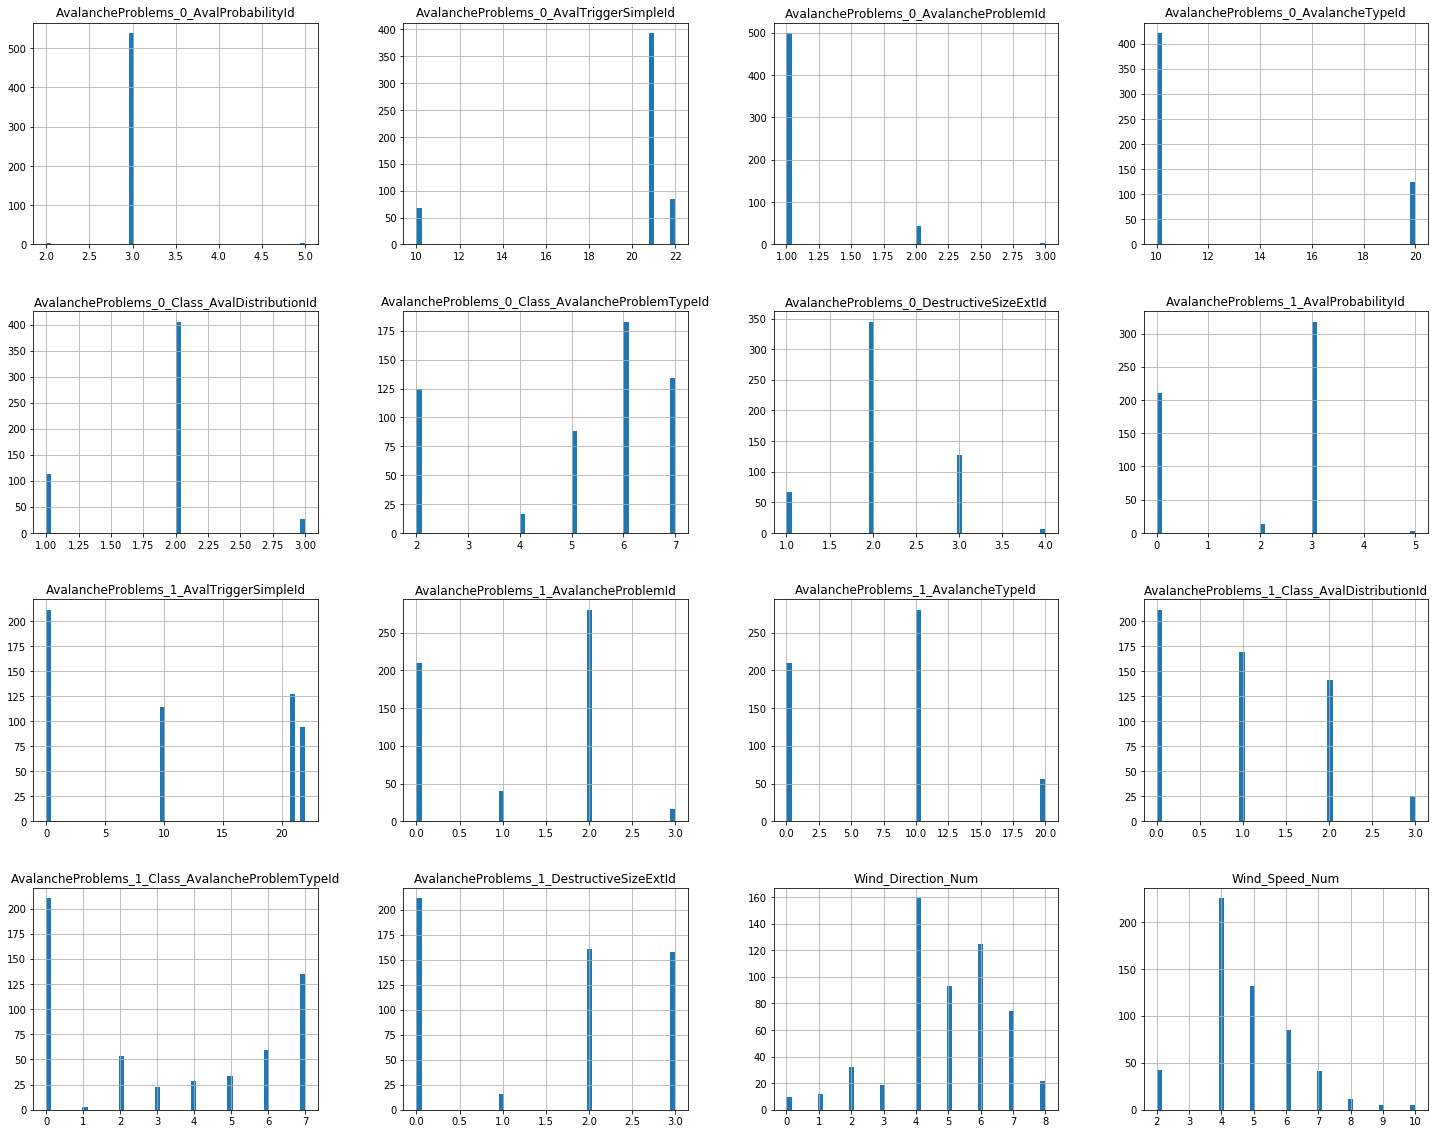

In [45]:
df_numdata.hist(bins=50, figsize=(25, 20))
plt.show()

In [18]:
# Remove all columns without data
#df_numdata = df_numdata.dropna(axis=1)

df_numdata.to_csv('varsom_numdata.csv', index_label='index')

## Split data into a training- and test-dataset
Randomly choose indicies that should serve a test data and which are removed from the training data.
Maybe write a function that chooses a certain % as test dxata

In [16]:
# Randomly shuffle the index of nba.
random_indices = np.random.permutation(df_numdata.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = np.int(np.floor(len(df_numdata)/3))
print(test_cutoff)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
df_test = df_numdata.loc[random_indices[1:test_cutoff]]
# Generate the train set with the rest of the data.
df_train = df_numdata.loc[random_indices[test_cutoff:]]

182


Separate the target variable in its own dataframe.

In [17]:
df_train_data = df_train.drop(['DangerLevel'], axis=1)
df_test_data = df_test.drop(['DangerLevel'], axis=1)

df_train_target = df_train.filter(['DangerLevel'], axis=1)
df_test_target = df_test.filter(['DangerLevel'], axis=1)

In [18]:
df_train_data.to_csv('varsom_train_data.csv', index_label='index')
df_test_data.to_csv('varsom_test_data.csv', index_label='index')

df_train_target.to_csv('varsom_train_target.csv', index_label='index')
df_test_target.to_csv('varsom_test_target.csv', index_label='index')